In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import skbio
from skbio.stats.distance import permanova
from skbio.stats.distance import DistanceMatrix
from matplotlib import rcParams as rcParams
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
from matplotlib import rc as rc
import matplotlib.gridspec as gridspec
from skbio.diversity import beta_diversity
from skbio.diversity import alpha_diversity
from skbio.stats.ordination import pcoa
from sklearn import decomposition
from sklearn.preprocessing import scale
import matplotlib.gridspec as gridspec
from skbio.stats.distance import mantel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [27]:
file_path = '../minion_Illumina_primers_Dan/'
method = 'minimap'

In [28]:
barcodes = pd.read_csv(file_path + 'barcodes_Illumina_minion.csv', index_col=0)
barcodes['Barcode'] = ['barcode' + str(x).zfill(2) for x in barcodes['Barcode']]
barcodes['Sample'] = barcodes.index
barcodes.index = barcodes['Barcode']
barcodes['Site'] = [x[:3] for x in barcodes['Sample']]
barcodes.drop('Barcode', inplace = True, axis = 1)
barcodes

,Sample,Site
Barcode,,
barcode01,ARD-V-Pro-85E-1,ARD
barcode02,ARD-V-Pro-85E-2,ARD
barcode03,ARD-V-Pro-85E-3,ARD
barcode04,ARD-V-Pro-86E-1,ARD
barcode05,ARD-V-Pro-86E-2,ARD
barcode06,ARD-V-Pro-86E-3,ARD
barcode07,ARD-V-Pro-88C-1,ARD
barcode08,ARD-V-Pro-88C-2,ARD
barcode09,ARD-V-Pro-88C-3,ARD


In [29]:
mapping_file = barcodes.copy()

In [30]:
!ls $file_path

barcodes_Illumina_minion.csv  minimap_otu_table_phyla_reshaped.csv
final.minimap.cons.taxonomy   out_dir
final.minimap.shared	      temp.minimap.csv
final.vsearch.cons.taxonomy   vsearch_otu_table_phyla_reshaped.csv
final.vsearch.shared	      zymo_genus.csv


In [37]:
minimap_taxa = pd.read_csv(file_path + 'final.' + method + '.cons.taxonomy', sep = '\t', index_col=0)
# Had to do this for the new file, not for previous files
if method == 'minimap':
    minimap_taxa.drop('OTU1', inplace=True)
print(minimap_taxa.shape)
minimap_taxa.head()

(53031, 2)


,Size,Taxonomy
OTU,,
OTU2,13.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
OTU3,4.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
OTU4,8.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
OTU5,7.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
OTU6,6.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...


In [32]:
minimap_otu_table = pd.read_csv(file_path + 'final.' + method + '.shared', sep = '\t')
if method == 'minimap':
    minimap_otu_table.drop('OTU1', axis = 1, inplace=True)
print(minimap_otu_table.shape)
minimap_otu_table = minimap_otu_table.drop(['label','numOtus'], axis = 1).set_index('group')
minimap_otu_table.head()

(29, 53034)


,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,OTU10,OTU11,...,OTU53023,OTU53024,OTU53025,OTU53026,OTU53027,OTU53028,OTU53029,OTU53030,OTU53031,OTU53032
group,,,,,,,,,,,,,,,,,,,,,
barcode01,1,0,0,0,1,0,0,1,0,3,...,0,0,0,0,0,0,0,0,1,0
barcode02,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,1,0,0,0
barcode03,0,0,0,1,0,0,0,0,0,2,...,0,1,0,0,0,1,0,0,0,0
barcode04,1,0,0,1,0,0,0,0,0,8,...,0,0,0,0,0,1,0,0,1,0
barcode05,2,0,0,0,0,0,0,0,0,3,...,0,0,1,0,0,1,0,0,0,0


In [33]:
mapping_file.head()

,Sample,Site
Barcode,,
barcode01,ARD-V-Pro-85E-1,ARD
barcode02,ARD-V-Pro-85E-2,ARD
barcode03,ARD-V-Pro-85E-3,ARD
barcode04,ARD-V-Pro-86E-1,ARD
barcode05,ARD-V-Pro-86E-2,ARD


In [34]:
print(len(minimap_otu_table.columns))
print(len(minimap_taxa.index))
print(len(set(minimap_otu_table.columns) - set(minimap_taxa.index)))

53031
53032
0


In [35]:
minimap_taxa

,Size,Taxonomy
OTU,,
OTU1,960.0,*
OTU2,13.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
OTU3,4.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
OTU4,8.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
OTU5,7.0,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;...
...,...,...
OTU53028,4.0,k__Bacteria;p__unclassified;c__unclassified;o_...
OTU53029,1.0,k__Bacteria;p__unclassified;c__unclassified;o_...
OTU53030,1.0,k__Bacteria;p__unclassified;c__unclassified;o_...


In [38]:
# preparing phyla
minimap_otu_table.columns = [x.split('p__')[1].split(';')[0] if x != 'unclassified' else x for x in minimap_taxa['Taxonomy']]

In [39]:
minimap_otu_table_phyla = minimap_otu_table.copy()
minimap_otu_table_phyla['Site'] = barcodes['Site']
minimap_otu_table_phyla['Samples'] = minimap_otu_table_phyla.index
minimap_otu_table_phyla = minimap_otu_table_phyla.melt(id_vars=['Samples','Site'])
minimap_otu_table_phyla = minimap_otu_table_phyla.groupby(['Site','variable']).sum()
minimap_otu_table_phyla = minimap_otu_table_phyla.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
minimap_otu_table_phyla.rename(columns= {'variable':'Phyla','value':'Abundance'}, inplace = True)
# minimap_otu_table_phyla.drop(['Samples'], axis = 1, inplace = True)
minimap_otu_table_phyla

,Site,Phyla,Abundance
0,ARD,AD3,0.000087
1,ARD,Acidobacteria,12.531282
2,ARD,Actinobacteria,24.243910
3,ARD,Aquificae,0.000000
4,ARD,Armatimonadetes,0.080127
...,...,...,...
320,Zym,WS3,0.000000
321,Zym,WS4,0.000000
322,Zym,WS6,0.000000
323,Zym,ZB3,0.000000


In [40]:
df_index = minimap_otu_table_phyla.groupby('Site', sort=False).sum().index
df_columns = minimap_otu_table_phyla[minimap_otu_table_phyla['Site'] == 'ARD']['Phyla']
minimap_otu_table_phyla_reshaped = pd.DataFrame(index = df_index, columns = df_columns)
minimap_otu_table_phyla_reshaped

Phyla,AD3,Acidobacteria,Actinobacteria,Aquificae,Armatimonadetes,BHI80-139,BRC1,Bacteroidetes,Chlamydiae,Chlorobi,...,Thermotogae,Verrucomicrobia,WPS-2,WS1,WS2,WS3,WS4,WS6,ZB3,unclassified
Site,,,,,,,,,,,,,,,,,,,,,
ARD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zym,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
print(len(minimap_otu_table_phyla_reshaped.loc['ARD',:]))
print(len(minimap_otu_table_phyla[minimap_otu_table_phyla['Site'] == 'ARD']['Abundance']))

65
65


In [42]:
print(len(minimap_otu_table_phyla[minimap_otu_table_phyla['Site'] == 'PCR']['Abundance']))

65


In [47]:
for i in df_index:
    print(i)
    for j in df_columns:
        if j in minimap_otu_table_phyla[minimap_otu_table_phyla['Site'] == i]['Phyla'].values:
#             print(minimap_otu_table_phyla[(minimap_otu_table_phyla['Site'] == i) & (minimap_otu_table_phyla['Phyla'] == j)]['Abundance'].values)
            minimap_otu_table_phyla_reshaped.loc[i,j] = minimap_otu_table_phyla[(minimap_otu_table_phyla['Site'] == i) & (minimap_otu_table_phyla['Phyla'] == j)]['Abundance'].values[0]
        else:
            minimap_otu_table_phyla_reshaped.loc[i,j] = 0
minimap_otu_table_phyla_reshaped.to_csv(file_path + method + '_otu_table_phyla_reshaped.csv')
minimap_otu_table_phyla_reshaped

ARD
H20
PCR
Pen
Zym


Phyla,AD3,Acidobacteria,Actinobacteria,Aquificae,Armatimonadetes,BHI80-139,BRC1,Bacteroidetes,Chlamydiae,Chlorobi,...,Thermotogae,Verrucomicrobia,WPS-2,WS1,WS2,WS3,WS4,WS6,ZB3,unclassified
Site,,,,,,,,,,,,,,,,,,,,,
ARD,8.7379e-05,12.5313,24.2439,0,0.0801265,0.00174758,0.0564468,6.15244,0.340341,0.0471846,...,0,2.37627,0.0033204,0,0.00637867,0.209797,8.7379e-05,0.00637867,0,0.0102233
H20,0,0,5.6872,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PCR,0,0,0,0,0,0,0,25,0,0,...,0,0,0,0,0,0,0,0,0,0
Pen,0.0175653,12.4233,25.497,0.000289538,0.272744,0.0120641,0.0493179,6.58939,0.296873,0.0870543,...,9.65125e-05,4.94849,0.117166,9.65125e-05,0.0137048,0.007721,9.65125e-05,0.00627331,9.65125e-05,0.0370608
Zym,0,0.00171372,0.00171372,0,0,0,0,0.000856861,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
minimap_otu_table_phyla_reshaped_final = minimap_otu_table_phyla_reshaped.copy()
for i in df_columns:
    if minimap_otu_table_phyla_reshaped_final[i].sum() < 5:
#         print('yes', i)
        minimap_otu_table_phyla_reshaped_final = minimap_otu_table_phyla_reshaped_final.rename(columns = {i:'Other'})
minimap_otu_table_phyla_reshaped_final = minimap_otu_table_phyla_reshaped_final.groupby(minimap_otu_table_phyla_reshaped_final.columns, axis=1).sum()
# minimap_otu_table_phyla_reshaped_final = minimap_otu_table_phyla_reshaped_final.reindex(['ARDEC', 'Pendleton','ExtH2O','PCR1H2O','Zymo'])

In [45]:
minimap_otu_table_phyla_reshaped_final

Phyla,Acidobacteria,Actinobacteria,Bacteroidetes,Chloroflexi,Firmicutes,Gemmatimonadetes,Other,Planctomycetes,Proteobacteria,Verrucomicrobia
Site,,,,,,,,,,
ARD,12.531282,24.243910,6.152441,8.839782,4.248978,4.092045,2.139736,8.287459,27.088095,2.376271
H20,0.000000,5.687204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.312796,0.000000
PCR,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000
Pen,12.423285,25.496967,6.589392,3.364330,5.747321,4.532324,3.299087,7.097241,26.501566,4.948486
Zym,0.001714,0.001714,0.000857,0.000857,68.873656,0.000000,0.000857,0.000000,31.120346,0.000000


Text(0.5, 0, 'Site')

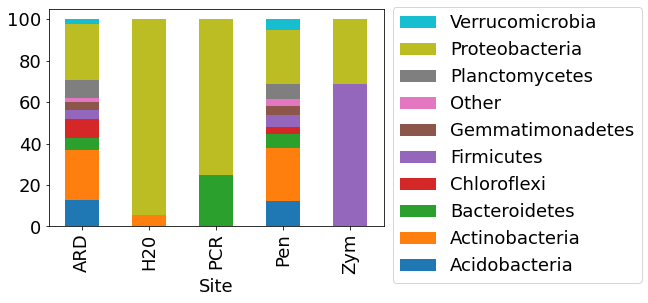

In [46]:
# minimap
ax = minimap_otu_table_phyla_reshaped_final.plot(kind='bar', stacked=True, cmap='tab10', fontsize=18)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1.0, 1.05), loc=2, fontsize = 18)
ax.set_xlabel('Site', fontsize = 18)

Text(0.5, 0, 'Site')

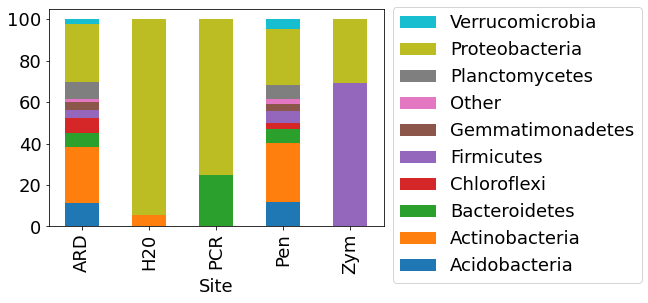

In [25]:
# vsearch 90
ax = minimap_otu_table_phyla_reshaped_final.plot(kind='bar', stacked=True, cmap='tab10', fontsize=18)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1.0, 1.05), loc=2, fontsize = 18)
ax.set_xlabel('Site', fontsize = 18)